In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle

In [2]:
from sklearn.metrics import precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay,f1_score

# Training Data Default

In [3]:
players = pd.read_csv("Data/players.csv")
match = pd.read_csv("Data/match.csv")

# More Data

In [4]:
early_game = pd.read_csv("All_data_early_game.csv")

# Testing Data Later On

In [5]:
# players_test = pd.read_csv("Data/test_player.csv")
# match_test = pd.read_csv("Data/test_labels.csv")

# Preprocessing

In [6]:
hero_id_compiled = []

for i in tqdm(range(len(players)//10)):
    temp_hero_id = []
    temp_hero_id = [players.hero_id[(i*10)+j] for j in range(10)]
    hero_id_compiled.append(temp_hero_id)

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:03<00:00, 12680.97it/s]


In [7]:
# account_cols = [f"account_{i}" for i in range(10)]
# players_train[account_cols] = account_id_compiled
id_number = [0,1,2,3,4,128,129,130,131,132]
hero_cols = [f"hero_{i}" for i in id_number]

players_train = pd.DataFrame(hero_id_compiled, columns=hero_cols)
players_train["match_id"] = np.arange(1,50001,1)


In [57]:
match_win = match.radiant_win.copy()
match_win = match_win.map({True:1,False:0})

## Preprocess Phase - Concatenate Datasets

In [11]:
full_data = pd.concat([early_game,players_train,match_win],axis=1)
preprocessed_data = full_data.dropna()
preprocessed_data.drop([preprocessed_data.columns[0],"match_id","times"],axis=1,inplace=True)
preprocessed_data.columns

Index(['Unnamed: 0', 'match_id', 'times', 'gold_t_0', 'lh_t_0', 'xp_t_0',
       'gold_t_1', 'lh_t_1', 'xp_t_1', 'gold_t_2', 'lh_t_2', 'xp_t_2',
       'gold_t_3', 'lh_t_3', 'xp_t_3', 'gold_t_4', 'lh_t_4', 'xp_t_4',
       'gold_t_128', 'lh_t_128', 'xp_t_128', 'gold_t_129', 'lh_t_129',
       'xp_t_129', 'gold_t_130', 'lh_t_130', 'xp_t_130', 'gold_t_131',
       'lh_t_131', 'xp_t_131', 'gold_t_132', 'lh_t_132', 'xp_t_132', 'hero_0',
       'hero_1', 'hero_2', 'hero_3', 'hero_4', 'hero_128', 'hero_129',
       'hero_130', 'hero_131', 'hero_132', 'match_id', 'radiant_win'],
      dtype='object')

# Create X and Y Datasets

In [16]:
X_data = preprocessed_data.drop(["radiant_win"],axis=1)
Y_data = preprocessed_data.radiant_win
# Y_data = pd.DataFrame()
# Y_data["radiant_win"] = preprocessed_data.radiant_win

# Train, Test, Split

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)

# Feed-Forward Neural Network (FNN)

In [36]:
X_train

,gold_t_0,lh_t_0,xp_t_0,gold_t_1,lh_t_1,xp_t_1,gold_t_2,lh_t_2,xp_t_2,gold_t_3,...,hero_0,hero_1,hero_2,hero_3,hero_4,hero_128,hero_129,hero_130,hero_131,hero_132
39229,4013.0,42.0,3480.0,2741.0,10.0,3119.0,5100.0,66.0,6341.0,5893.0,...,104.0,33.0,8.0,74.0,86.0,30.0,31.0,1.0,96.0,97.0
34043,5835.0,54.0,5869.0,5328.0,42.0,3827.0,6666.0,88.0,7345.0,6676.0,...,2.0,14.0,23.0,73.0,57.0,59.0,21.0,79.0,7.0,30.0
41864,3180.0,18.0,3025.0,5694.0,41.0,6400.0,3567.0,6.0,3234.0,6366.0,...,10.0,62.0,60.0,68.0,18.0,112.0,14.0,21.0,73.0,53.0
14441,3781.0,8.0,3284.0,6862.0,58.0,5761.0,4586.0,19.0,4699.0,2882.0,...,17.0,84.0,19.0,5.0,96.0,53.0,21.0,80.0,31.0,93.0
30288,3245.0,26.0,3401.0,5163.0,59.0,6066.0,3583.0,23.0,4826.0,2453.0,...,22.0,27.0,30.0,63.0,81.0,8.0,104.0,7.0,54.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,6200.0,73.0,5693.0,3971.0,37.0,4139.0,3039.0,23.0,3078.0,6289.0,...,69.0,1.0,31.0,13.0,26.0,72.0,110.0,82.0,112.0,100.0
44732,2233.0,12.0,2339.0,5904.0,112.0,5394.0,5993.0,46.0,7308.0,4316.0,...,21.0,1.0,101.0,11.0,16.0,93.0,112.0,59.0,7.0,32.0
38158,2493.0,21.0,3099.0,2912.0,24.0,3034.0,1916.0,3.0,3203.0,4902.0,...,112.0,4.0,44.0,17.0,88.0,71.0,1.0,6.0,11.0,68.0
860,4389.0,35.0,5066.0,4870.0,30.0,4324.0,3972.0,49.0,4140.0,4685.0,...,97.0,21.0,57.0,75.0,15.0,101.0,67.0,50.0,19.0,91.0


In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential([
    Dense(144, activation='relu', input_dim=X_train.shape[1]),
    Dense(72, activation='relu'),
    Dropout(0.2),
    Dense(36, activation='relu'),
    Dropout(0.3),
    Dense(9, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/100
400/400 [==============================] - 6s 7ms/step - loss: 13.1038 - accuracy: 0.5026 - val_loss: 0.6926 - val_accuracy: 0.5210
Epoch 2/100
400/400 [==============================] - 2s 5ms/step - loss: 0.9936 - accuracy: 0.5170 - val_loss: 0.6924 - val_accuracy: 0.5210
Epoch 3/100
400/400 [==============================] - 2s 5ms/step - loss: 0.7869 - accuracy: 0.5176 - val_loss: 0.6923 - val_accuracy: 0.5210
Epoch 4/100
400/400 [==============================] - 2s 5ms/step - loss: 0.7299 - accuracy: 0.5177 - val_loss: 0.6923 - val_accuracy: 0.5210
Epoch 5/100
400/400 [==============================] - 2s 5ms/step - loss: 0.7240 - accuracy: 0.5179 - val_loss: 0.6923 - val_accuracy: 0.5210
Epoch 6/100
400/400 [==============================] - 2s 5ms/step - loss: 0.7087 - accuracy: 0.5183 - val_loss: 0.6923 - val_accuracy: 0.5210
Epoch 7/100
400/400 [==============================] - 2s 5ms/step - loss: 0.7083 - accuracy: 0.5181 - val_loss: 0.6923 - val_accuracy: 0.521

Epoch 58/100
400/400 [==============================] - 2s 6ms/step - loss: 0.6925 - accuracy: 0.5183 - val_loss: 0.6923 - val_accuracy: 0.5210
Epoch 59/100
400/400 [==============================] - 2s 6ms/step - loss: 0.6925 - accuracy: 0.5183 - val_loss: 0.6923 - val_accuracy: 0.5210
Epoch 60/100
400/400 [==============================] - 3s 6ms/step - loss: 0.6925 - accuracy: 0.5183 - val_loss: 0.6923 - val_accuracy: 0.5210
Epoch 61/100
400/400 [==============================] - 2s 6ms/step - loss: 0.6925 - accuracy: 0.5183 - val_loss: 0.6923 - val_accuracy: 0.5210
Epoch 62/100
400/400 [==============================] - 2s 6ms/step - loss: 0.6925 - accuracy: 0.5183 - val_loss: 0.6923 - val_accuracy: 0.5210
Epoch 63/100
400/400 [==============================] - 3s 6ms/step - loss: 0.6925 - accuracy: 0.5183 - val_loss: 0.6923 - val_accuracy: 0.5210
Epoch 64/100
400/400 [==============================] - 2s 6ms/step - loss: 0.6927 - accuracy: 0.5183 - val_loss: 0.6923 - val_accuracy:

In [44]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay,accuracy_score,recall_score,precision_score,f1_score

In [50]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

312/312 [==============================] - 0s 619us/step


Accuracy: 0.5210463018641011 
Precision: 0.5210463018641011 
Recall: 1.0 
F1-Score: 0.6851156355010872


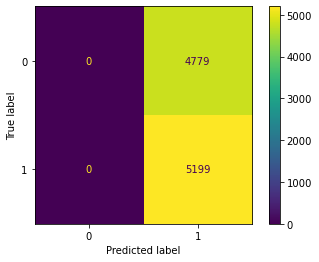

In [52]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
# f1_score = f1_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_disp = ConfusionMatrixDisplay(conf_matrix)
print("Accuracy:", accuracy,"\nPrecision:", precision,"\nRecall:", recall,"\nF1-Score:", f1_score)
conf_matrix_disp.plot()

# Try Using GridSearchCV or RandomizedSearchCV

In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [47]:
param_grid = {'C': [0.1, 1, 10, 100, 0.01], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf',"linear"]} 

In [37]:
grid_search = RandomizedSearchCV(estimator=SVC(kernel='linear'),param_distributions=param_grid,cv=5,n_jobs=-1,verbose=2)

In [49]:
%%time

grid_search.fit(X_train,y_train)

best_param = grid_search.best_params_
best_rf = grid_search.best_estimator_

print(best_param,best_rf)

NameError: name 'grid_search' is not defined

In [227]:
file_name = "Dota_2_Prediction_Model_FNN.sav"
pickle.dump(rf, open(file_name,"wb"))

In [198]:
loaded_model = pickle.load(open(file_name, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.5252555622369213


# Testing

In [28]:
# pd.read_csv("Data/test_player.csv")

In [200]:
y_pred = loaded_model.predict(X_test)

In [201]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [202]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

Accuracy: 0.5252555622369213 
Precision: 0.5273372781065089 
Recall: 0.857087901519523


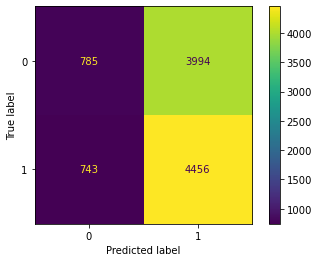

In [204]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_disp = ConfusionMatrixDisplay(conf_matrix)
print("Accuracy:", accuracy,"\nPrecision:", precision,"\nRecall:", recall)
conf_matrix_disp.plot()

# Random Testing

In [29]:
hero_name = pd.read_csv("Data/hero_names.csv")

In [30]:
hero_name

,name,hero_id,localized_name
0,npc_dota_hero_antimage,1,Anti-Mage
1,npc_dota_hero_axe,2,Axe
2,npc_dota_hero_bane,3,Bane
3,npc_dota_hero_bloodseeker,4,Bloodseeker
4,npc_dota_hero_crystal_maiden,5,Crystal Maiden
...,...,...,...
107,npc_dota_hero_terrorblade,109,Terrorblade
108,npc_dota_hero_phoenix,110,Phoenix
109,npc_dota_hero_oracle,111,Oracle
110,npc_dota_hero_winter_wyvern,112,Winter Wyvern


In [136]:
%%time

index_val = X_test.index
rand_test = np.random.randint(0,len(index_val))

df_test = X_test.loc[X_test.index[rand_test:rand_test+1]]

y_pred = rf.predict(df_test)

radiant = []
dire = []

hero_test = df_test[df_test.columns[10:20]]

for i in tqdm(range(len(hero_test.columns))):
    for j in range(len(hero_name)):
        if int(hero_test[hero_test.columns[i]])==hero_name.hero_id[j]:
            if i<5:
                radiant.append(hero_name.localized_name[j])
            else:
                dire.append(hero_name.localized_name[j])

print(f"This is using {rf}")
print("Accuracy:", accuracy,"\nPrecision:", precision,"\nRecall:", recall,"\nF1-Score:", f1_score,"\n")

if y_pred[0]==True:
    print("Radiant won!\n")
    print("With heroes in radiant :")
    for i in radiant:
        print(i)
    print("\nversus dire heroes :")
    for i in dire:
        print(i)

else:
    print("Radiant lost!\n")
    print("With heroes in radiant :")
    for i in radiant:
        print(i)
    print("\nversus dire heroes :")
    for i in dire:
        print(i)


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 229.21it/s]

This is using RandomForestClassifier(max_depth=2, max_features='log2', min_samples_leaf=2)
Accuracy: 0.5216476247745039 
Precision: 0.5213898373167303 
Recall: 0.9986535872283131 
F1-Score: 0.6850959952497195 

Radiant won!

With heroes in radiant :
Lina
Earthshaker
Disruptor
Queen of Pain
Tiny

versus dire heroes :
Slardar
Omniknight
Jakiro
Viper
Axe
CPU times: total: 93.8 ms
Wall time: 89.1 ms
